In [ ]:
# Source:
# https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00828
#  - https://www.ncei.noaa.gov/thredds/catalog/cdr-total-solar-irradiance/monthly/catalog.html
#  - https://www.ncei.noaa.gov/data/total-solar-irradiance/access/

# find way to open .nc file type
# Here's a tutorial:
# https://cslocumwx.github.io/blog/2015/01/19/python-netcdf-part1/

# Use Fourier Transfrom to create algorithm
# https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.RBFSampler.html
# https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.SkewedChi2Sampler.html

# Fourier continued...
# https://towardsdatascience.com/fun-with-fourier-591662576a77
# https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html

# Convert to cyclical features
# https://www.kaggle.com/avanwyk/encoding-cyclical-features-for-deep-learning

# Monthly

In [1]:
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels

# Source: http://www.sidc.be/silso/datafiles#total

url = 'http://www.sidc.be/silso/DATA/SN_m_tot_V2.0.txt'  #monthly

text = [l[:-1].decode("utf-8") for l in urllib.request.urlopen(url).readlines()]

In [5]:
columns = ['year','month','yr_mnth', 'mean', 'std', 'cnt', 'def']
df = pd.DataFrame([l.split() for l in text], columns=columns)
df[['year','month','cnt']] = df[['year','month','cnt']].astype(int)
df[['yr_mnth','mean','std']] = df[['yr_mnth','mean','std']].astype(float)
df.set_index('yr_mnth', inplace=True)
df.head()

,year,month,mean,std,cnt,def
yr_mnth,,,,,,
1749.042,1749,1,96.7,-1.0,-1,None
1749.123,1749,2,104.3,-1.0,-1,None
1749.204,1749,3,116.7,-1.0,-1,None
1749.288,1749,4,92.8,-1.0,-1,None
1749.371,1749,5,141.7,-1.0,-1,None


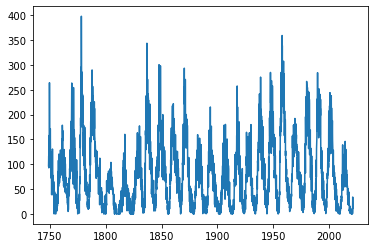

In [6]:
x=df.index
y=df['mean']
plt.plot(x,y)

In [76]:
from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tsa.arima.model import ARIMAResults

model = ARIMA(df['mean'],order=(100,1,35)).fit()

C:\ProgramData\Anaconda3\envs\cmtle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\envs\cmtle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\envs\cmtle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\envs\cmtle\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramD

C:\ProgramData\Anaconda3\envs\cmtle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


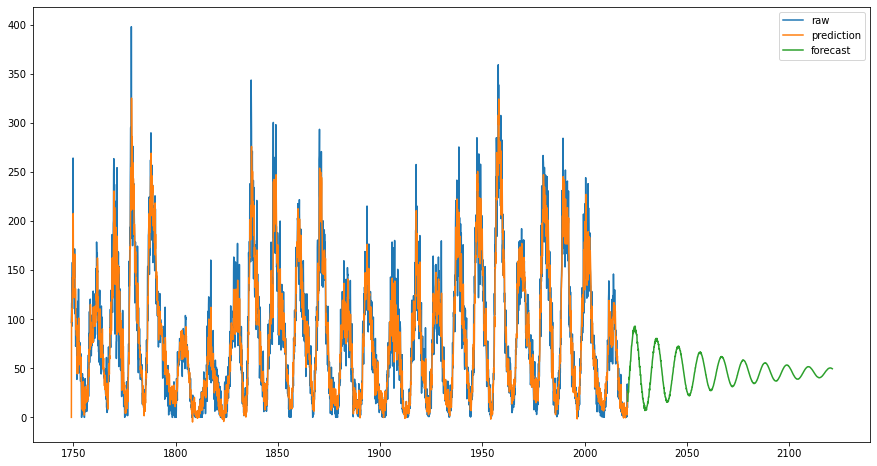

In [88]:
fig = plt.figure(figsize=(15,8))

x1=df.index
y1=df['mean']
plt.plot(x1,y1, label='raw')
x2=df.index
y2=model.predict()
plt.plot(x2,y2, label='prediction')

# Get Forecasts
n = 1200  # number of months
max_yr = round(max(df.index),0)
max_mn = (max(df.index) - max_yr) * 12
start = (max_yr + int((max_mn+1)/13)) + ((max_mn+1)%13 / 12)

x_pred = np.arange(start,start+(n/12),1/12)
y_pred = model.predict(len(x2), len(x2)+n)
# pd.DataFrame([x_pred, y_pred], index=['x','y']).T.set_index('x')  # converts results to dataframe

x3=x_pred
y3=y_pred
plt.plot(x3,y3, label='forecast')
plt.legend()


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

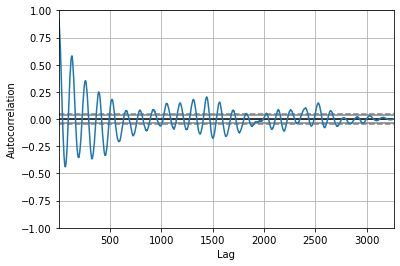

In [69]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['mean'])  # Lag (p) of ~2700??

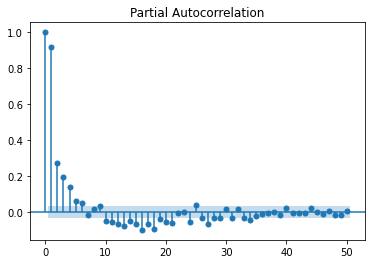

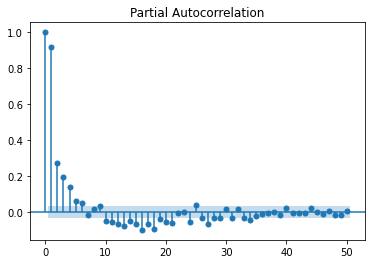

In [73]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['mean'], lags=50) #q=35

# Yearly

In [89]:
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels

# Source: http://www.sidc.be/silso/datafiles#total

url = 'http://www.sidc.be/silso/DATA/SN_y_tot_V2.0.txt'  #monthly

text = [l[:-1].decode("utf-8") for l in urllib.request.urlopen(url).readlines()]

In [97]:
columns = ['year', 'mean', 'std', 'cnt', 'def']
df = pd.DataFrame([l.split() for l in text], columns=columns)
df[['year','mean','std']] = df[['year','mean','std']].astype(float)
df[['year','cnt']] = df[['year','cnt']].astype(int)
df.set_index('year', inplace=True)
df.head()

,mean,std,cnt,def
year,,,,
1700,8.3,-1.0,-1,None
1701,18.3,-1.0,-1,None
1702,26.7,-1.0,-1,None
1703,38.3,-1.0,-1,None
1704,60.0,-1.0,-1,None


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

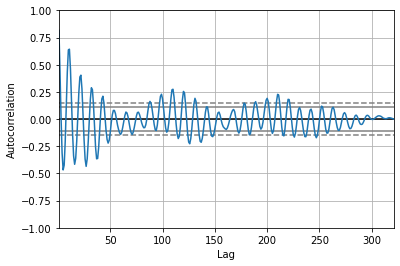

In [98]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['mean'])  # Lag (p) of ~2700??

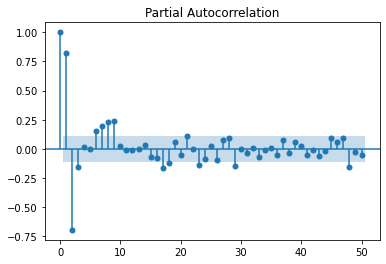

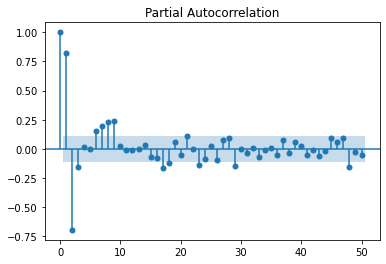

In [99]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['mean'], lags=50) #q=35

In [110]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['mean'],order=(260,1,30)).fit()

C:\ProgramData\Anaconda3\envs\cmtle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\envs\cmtle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\envs\cmtle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\envs\cmtle\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

C:\ProgramData\Anaconda3\envs\cmtle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


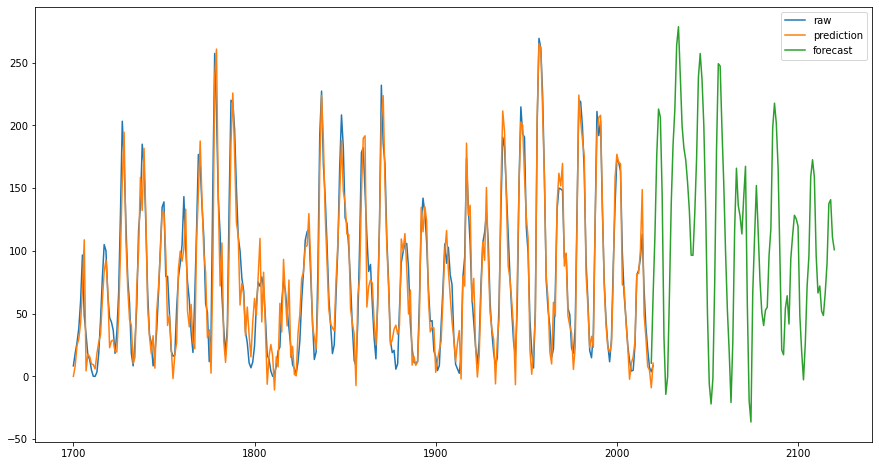

In [115]:
fig = plt.figure(figsize=(15,8))

x1=df.index
y1=df['mean']
plt.plot(x1,y1, label='raw')
x2=df.index
y2=model.predict()
plt.plot(x2,y2, label='prediction')

# Get Forecasts
n = 100  # number of months
# max_yr = max(df.index)
start = max(df.index)

x_pred = np.arange(start-1,start+n+1)
y_pred = model.predict(len(x2)-1, len(x2)+n)
# pd.DataFrame([x_pred, y_pred], index=['x','y']).T.set_index('x')  # converts results to dataframe

x3=x_pred
y3=y_pred
plt.plot(x3,y3, label='forecast')
plt.legend()

In [116]:
model.save('solar_annual.pkl')

In [118]:
from statsmodels.tsa.arima.model import ARIMAResults
loaded = ARIMAResults.load('solar_annual.pkl')

C:\ProgramData\Anaconda3\envs\cmtle\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


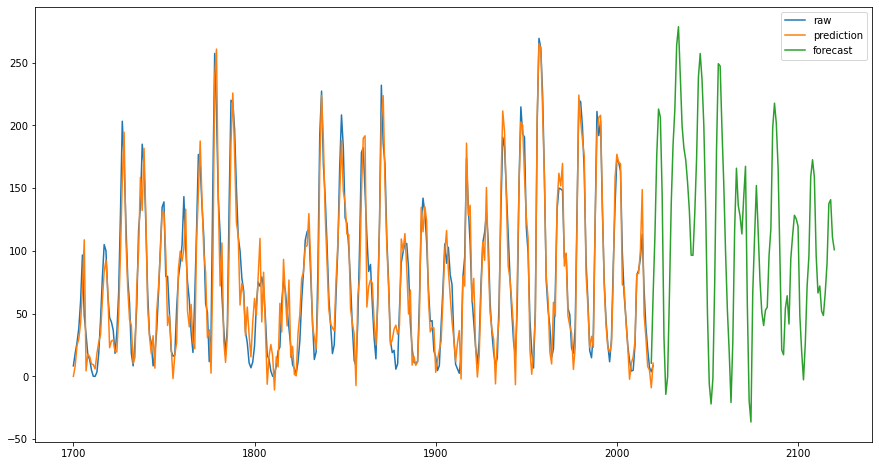

In [119]:
fig = plt.figure(figsize=(15,8))

x1=df.index
y1=df['mean']
plt.plot(x1,y1, label='raw')
x2=df.index
y2=loaded.predict()
plt.plot(x2,y2, label='prediction')

# Get Forecasts
n = 100  # number of months
# max_yr = max(df.index)
start = max(df.index)

x_pred = np.arange(start-1,start+n+1)
y_pred = loaded.predict(len(x2)-1, len(x2)+n)
# pd.DataFrame([x_pred, y_pred], index=['x','y']).T.set_index('x')  # converts results to dataframe

x3=x_pred
y3=y_pred
plt.plot(x3,y3, label='forecast')
plt.legend()